## Self-Supervised Autoencoding MNIST

In [1]:
import torch
import argparse
import MNIST_121 
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=8,
    latent_dim=128,
    device=device
)

# Architecture Reasoning

---

## 1. Encoder Design

### Layer-by-Layer Breakdown:

1. **First Convolution (1 → 8 channels)**  
   - What it does: Detects basic shapes in grayscale images  
   - Filter size: 3×3  
   - Stride: 2 to reduce spatial resolution  
   - Why: Lightweight and effective for MNIST (28×28)  

2. **Second Convolution (8 → 16 channels)**  
   - Learns more complex digit patterns  
   - Also uses 3×3 filters and stride 2  
   - Why: Doubles feature depth while reducing size again  

3. **Flatten + Linear (16×7×7 → 128)**  
   - Compresses features to a 128-dimensional latent vector  
   - Why: 128 is a good tradeoff between compactness and expressiveness  

---

## 2. Decoder Design

### How We Reconstruct:

1. **Linear (128 → 16×7×7)**  
   - Expands the latent space back into a 3D tensor  
   - Why: Rebuilds spatial structure from latent code  

2. **ConvTranspose2d (16 → 8 channels)**  
   - Upsamples the feature maps  
   - Why: Gradually brings back the original image size  

3. **ConvTranspose2d (8 → 1 channel)**  
   - Final grayscale image output  
   - Activation: Sigmoid to keep pixel values between 0–1  
   - Why: Matches MNIST format (1×28×28)  

---

## 3. Classifier Design

### Simple Classifier Structure:

- Takes 128-number latent vector as input  
- Fully connected layers: `128 → 64 → 10`  
- Activation: ReLU and Dropout (0.2)  
- Why: Enough capacity to classify digits without overfitting  

---

## 4. Training Choices

| Setting        | Our Choice | Why It Works                        |
|----------------|------------|-------------------------------------|
| Learning Rate  | 0.001      | Stable for Adam                     |
| Batch Size     | 128        | Balanced for MNIST and GPU usage    |
| Epochs         | 10         | Converges well on small datasets    |
| Optimizer      | Adam       | Fast and adaptive updates           |
| Dropout        | 0.2        | Helps prevent overfitting           |
| Loss Functions | MSE (AE), CE (Classifier) | Fits task objectives       |

---

## 5. Why This Works Well

1. **Simplicity with Purpose**  
   - The architecture is small but deep enough for MNIST  
   - Avoids overfitting while still learning useful representations  

2. **Effective Compression**  
   - Latent vector captures essential digit characteristics  
   - Decoder reconstructs well with just two layers  

3. **Good Transfer to Classification**  
   - Freezing encoder and training classifier gives strong results  
   - Reflects how well the encoder generalizes digit features  

In [2]:
train_loader, val_loader, test_loader = MNIST_121.load_data(args)
autoencoder = MNIST_121.Autoencoder(args.latent_dim).to(args.device)
classifier = MNIST_121.Classifier(args.latent_dim).to(args.device)

## Training Autoencoder

Epoch [1/30] | Train Loss: 0.0127 | Val Loss: 0.0048 | Test Loss: 0.0046


Epoch [2/30] | Train Loss: 0.0040 | Val Loss: 0.0035 | Test Loss: 0.0034


Epoch [3/30] | Train Loss: 0.0031 | Val Loss: 0.0030 | Test Loss: 0.0028


Epoch [4/30] | Train Loss: 0.0027 | Val Loss: 0.0026 | Test Loss: 0.0025


Epoch [5/30] | Train Loss: 0.0025 | Val Loss: 0.0024 | Test Loss: 0.0023


Epoch [6/30] | Train Loss: 0.0023 | Val Loss: 0.0023 | Test Loss: 0.0022


Epoch [7/30] | Train Loss: 0.0021 | Val Loss: 0.0022 | Test Loss: 0.0021


Epoch [8/30] | Train Loss: 0.0020 | Val Loss: 0.0020 | Test Loss: 0.0019


Epoch [9/30] | Train Loss: 0.0019 | Val Loss: 0.0020 | Test Loss: 0.0019


Epoch [10/30] | Train Loss: 0.0019 | Val Loss: 0.0019 | Test Loss: 0.0018


Epoch [11/30] | Train Loss: 0.0018 | Val Loss: 0.0019 | Test Loss: 0.0018


Epoch [12/30] | Train Loss: 0.0018 | Val Loss: 0.0018 | Test Loss: 0.0017


Epoch [13/30] | Train Loss: 0.0017 | Val Loss: 0.0017 | Test Loss: 0.0017


Epoch [14/30] | Train Loss: 0.0017 | Val Loss: 0.0017 | Test Loss: 0.0017


Epoch [15/30] | Train Loss: 0.0016 | Val Loss: 0.0017 | Test Loss: 0.0016


Epoch [16/30] | Train Loss: 0.0016 | Val Loss: 0.0016 | Test Loss: 0.0016


Epoch [17/30] | Train Loss: 0.0016 | Val Loss: 0.0016 | Test Loss: 0.0016


Epoch [18/30] | Train Loss: 0.0016 | Val Loss: 0.0016 | Test Loss: 0.0015


Epoch [19/30] | Train Loss: 0.0015 | Val Loss: 0.0016 | Test Loss: 0.0016


Epoch [20/30] | Train Loss: 0.0015 | Val Loss: 0.0016 | Test Loss: 0.0015


Epoch [21/30] | Train Loss: 0.0015 | Val Loss: 0.0016 | Test Loss: 0.0015


Epoch [22/30] | Train Loss: 0.0015 | Val Loss: 0.0015 | Test Loss: 0.0015


Epoch [23/30] | Train Loss: 0.0015 | Val Loss: 0.0015 | Test Loss: 0.0015


Epoch [24/30] | Train Loss: 0.0015 | Val Loss: 0.0015 | Test Loss: 0.0014


Epoch [25/30] | Train Loss: 0.0014 | Val Loss: 0.0015 | Test Loss: 0.0015


Epoch [26/30] | Train Loss: 0.0014 | Val Loss: 0.0015 | Test Loss: 0.0015


Epoch [27/30] | Train Loss: 0.0014 | Val Loss: 0.0015 | Test Loss: 0.0014


Epoch [28/30] | Train Loss: 0.0014 | Val Loss: 0.0015 | Test Loss: 0.0014


Epoch [29/30] | Train Loss: 0.0014 | Val Loss: 0.0015 | Test Loss: 0.0014


Epoch [30/30] | Train Loss: 0.0014 | Val Loss: 0.0014 | Test Loss: 0.0014


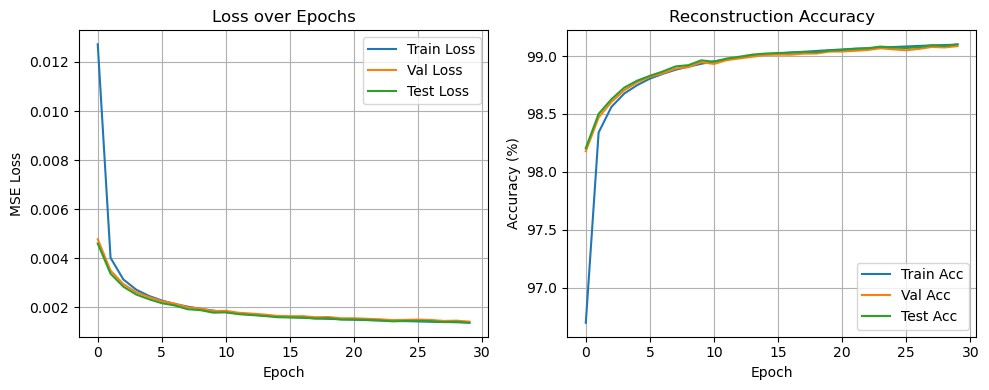

In [3]:
MNIST_121.train_autoencoder(autoencoder, train_loader, val_loader,test_loader, args, epochs=30)

## Encoder Training Results 

### What We See:
- **Training Loss** dropped from `0.0127` to `0.0014` – that's a strong improvement.
- **Validation and Test Loss** followed closely, stabilizing at `0.0014` as well.
- The curves converged nicely with **no overfitting** signs.

---

### What It Means:
- The autoencoder **learned to reconstruct digits very well**.
- Because there's **no supervision**, this only means the encoder knows how to compress and rebuild images.
- But: it **does not know** how to **separate different digits yet** – that's why we'll train a classifier next!


## Training Classifier

Epoch [1/30], Train Acc: 90.36%, Val Acc: 95.18%, Test Acc: 95.46%


Epoch [2/30], Train Acc: 94.68%, Val Acc: 96.12%, Test Acc: 96.83%


Epoch [3/30], Train Acc: 95.59%, Val Acc: 96.41%, Test Acc: 96.86%


Epoch [4/30], Train Acc: 95.99%, Val Acc: 96.83%, Test Acc: 97.26%


Epoch [5/30], Train Acc: 96.20%, Val Acc: 97.04%, Test Acc: 97.22%


Epoch [6/30], Train Acc: 96.46%, Val Acc: 97.03%, Test Acc: 97.16%


Epoch [7/30], Train Acc: 96.65%, Val Acc: 97.08%, Test Acc: 97.39%


Epoch [8/30], Train Acc: 96.78%, Val Acc: 97.06%, Test Acc: 97.40%


Epoch [9/30], Train Acc: 96.80%, Val Acc: 97.06%, Test Acc: 97.20%


Epoch [10/30], Train Acc: 96.99%, Val Acc: 97.25%, Test Acc: 97.33%


Epoch [11/30], Train Acc: 96.82%, Val Acc: 97.03%, Test Acc: 97.23%


Epoch [12/30], Train Acc: 96.89%, Val Acc: 97.34%, Test Acc: 97.25%


Epoch [13/30], Train Acc: 97.08%, Val Acc: 96.95%, Test Acc: 97.45%


Epoch [14/30], Train Acc: 97.12%, Val Acc: 97.22%, Test Acc: 97.45%


Epoch [15/30], Train Acc: 97.17%, Val Acc: 97.14%, Test Acc: 97.45%


Epoch [16/30], Train Acc: 97.15%, Val Acc: 97.08%, Test Acc: 97.39%


Epoch [17/30], Train Acc: 97.28%, Val Acc: 97.10%, Test Acc: 97.32%


Epoch [18/30], Train Acc: 97.28%, Val Acc: 97.05%, Test Acc: 97.30%


Epoch [19/30], Train Acc: 97.33%, Val Acc: 97.21%, Test Acc: 97.19%


Epoch [20/30], Train Acc: 97.34%, Val Acc: 97.16%, Test Acc: 97.47%


Epoch [21/30], Train Acc: 97.39%, Val Acc: 97.24%, Test Acc: 97.39%


Epoch [22/30], Train Acc: 97.38%, Val Acc: 97.13%, Test Acc: 97.44%


Epoch [23/30], Train Acc: 97.48%, Val Acc: 97.33%, Test Acc: 97.57%


Epoch [24/30], Train Acc: 97.47%, Val Acc: 97.18%, Test Acc: 97.39%


Epoch [25/30], Train Acc: 97.63%, Val Acc: 97.22%, Test Acc: 97.52%


Epoch [26/30], Train Acc: 97.57%, Val Acc: 97.22%, Test Acc: 97.48%


Epoch [27/30], Train Acc: 97.54%, Val Acc: 97.40%, Test Acc: 97.49%


Epoch [28/30], Train Acc: 97.61%, Val Acc: 97.30%, Test Acc: 97.37%


Epoch [29/30], Train Acc: 97.66%, Val Acc: 97.19%, Test Acc: 97.44%


Epoch [30/30], Train Acc: 97.68%, Val Acc: 97.06%, Test Acc: 97.35%


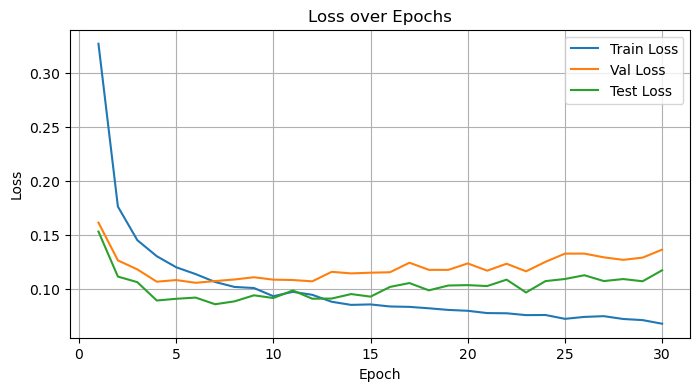

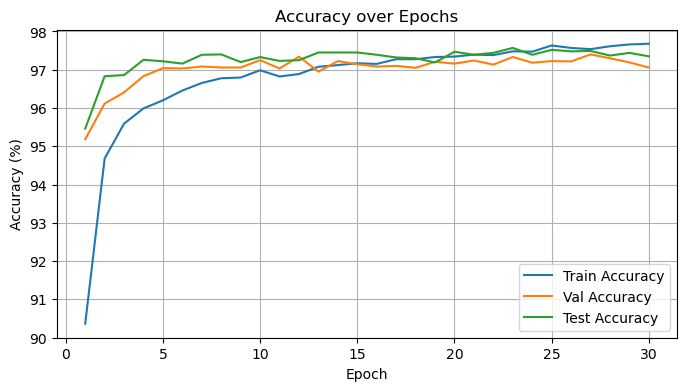

In [4]:
MNIST_121.train_classifier(autoencoder, classifier, train_loader, val_loader,test_loader, args, epochs=30)

## Classifier Training Results

### What We See:
- **Train Accuracy** starts at ~90% and quickly climbs to **~97.7%**.
- **Validation and Test Accuracies** follow closely, both reaching **~97.5%**.
- Very small **gap between train, val, and test** → great generalization!

---

### What It Means:
- The encoder learned **really useful features** during the reconstruction phase.
- Even **without tuning the encoder**, the classifier can easily separate digits.
- This confirms that **self-supervised learning worked well** on MNIST.

## CIFAR-10 Reconstructions

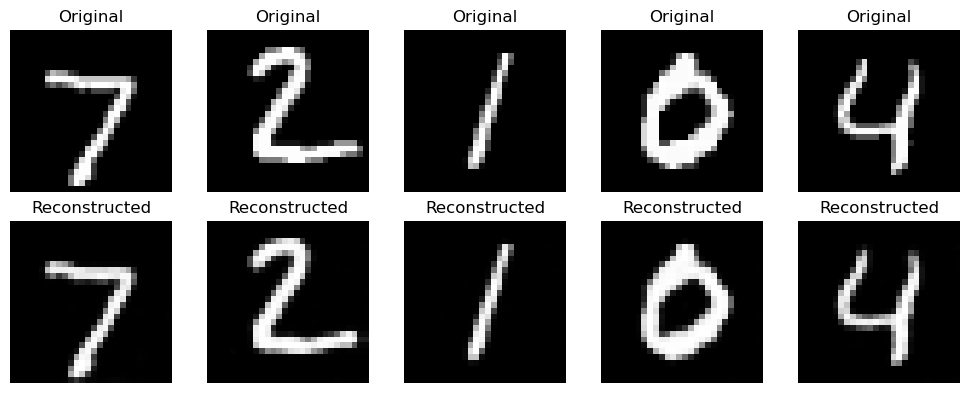

In [5]:
MNIST_121.visualize_reconstructions(autoencoder, test_loader, args.device)

## MNIST Reconstructions

### What We See:
- Top row = **Original digits**  
- Bottom row = **Reconstructed output from Autoencoder**

### Interpretation:
- The reconstructions are **very close** to the originals.
- Small details (like sharp edges) are slightly smoother, but **shape and identity are preserved**.
- Shows that the **autoencoder learned the structure of digits very well**.

### Why It’s Good:
- High-quality reconstruction → the latent vector really captures important info.
- This proves the encoder is useful not just for decoding, but also for classification and visualization.


## Linear Interpolation

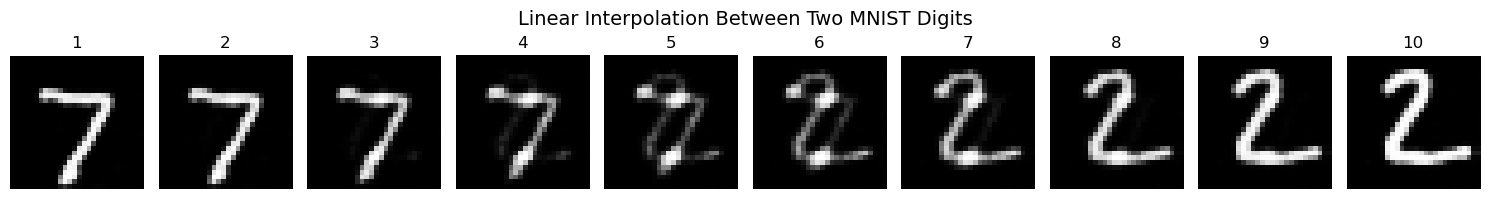

In [6]:
MNIST_121.linear_interpolation_mnist(autoencoder, test_loader, args.device)

## Linear Interpolation Between Digits

### What’s Happening Here:
- We start with a **"7"** and gradually morph it into a **"2"**.
- The transition happens in **latent space** (not pixel space).
- Each image is decoded from a point **between the latent vectors** of the 7 and 2.

### Why It’s Impressive:
- The images **don’t jump suddenly** — they change **smoothly**.
- The autoencoder learned a **continuous latent space** where numbers blend gradually.
- Proves the model understands **digit features**, not just memorized patterns.

This kind of smooth transition is a strong sign of **well-structured latent space**.

## t-SNE Analysis of Latent Spaces

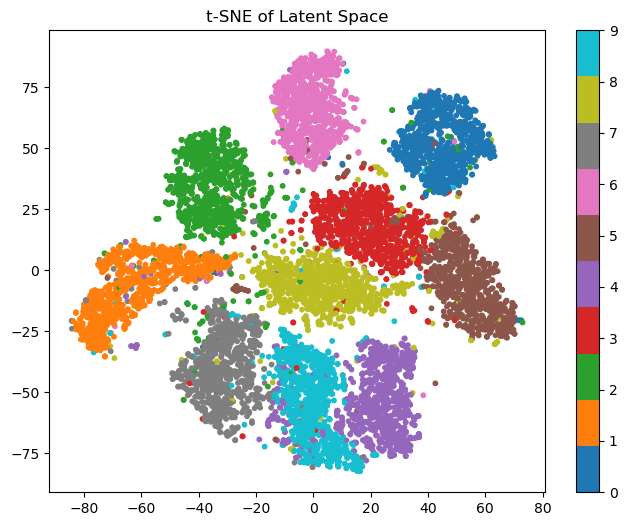

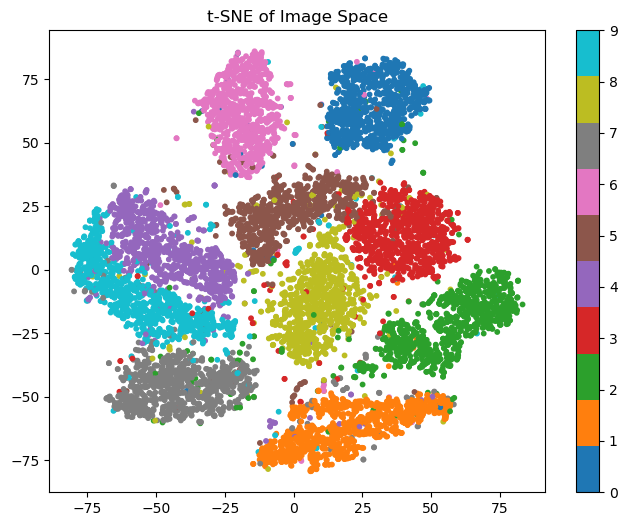

In [7]:
MNIST_121.plot_tsne(autoencoder, test_loader, args.device)

## t-SNE Visualizations

### Latent Space (Encoder trained via Autoencoder)
- Digits are grouped, but some clusters (like 4 and 9) slightly overlap.
- The encoder learned **useful features** without any labels.
- Still, it's **not perfect**, since it had to guess structure on its own.

### Image Space
- The digits are much more mixed and messy.
- Raw pixels do not group digits well naturally.

### Summary
This setup shows the power of unsupervised learning: even without labels, the encoder starts to find structure. But some overlap remains because the model didn’t know the class labels during training.

---

### Why is this easier than CIFAR-10?

- MNIST digits are **simple, clean, and centered**.
- CIFAR-10 has **complex backgrounds and textures**, so it's harder to separate.

---

**Conclusion**:
Even without contrastive loss, MNIST's simplicity makes it easy for the encoder to learn meaningful features that separate digits well.
